# <span style="color:red"> Lezione 06 </span>
## <span style="color:green"> Esercizio 06.1 </span>

Ho aggiunto al codice la simulazione di Ising 1D usando sia l'algoritmo di Metropolis sia quello di Gibbs. Per l'algoritmo di Metropolis ho determinato la probabilità $/alpha$ che uno spin casuale cambi orientazione come:
$$\alpha = \min{\big(1,e^{-2 \beta E(-s)}\big)}, $$
dove $\beta = \frac{1}{T}$, dove $T$ è la temperatura ed $E(-s)$ l'energia che avremmo nel punto scelto se invertissimo lo spin della particella presa in considerazione. Si noti che questa $E$ è stata valutata considerando solo i due spin adiacenti a quello sul quale si vuole calcolare l'energia; siamo in "nearest neighbor approximation". Quindi questa $\alpha$, per ogni step dell'algoritmo, dà la probabilità che avvenga un cambio di spin in una particella casuale.

Per quanto riguarda l'algoritmo di Gibbs, ho invece determinato una probabilità $\mathcal{a}$ che la particella scelta casualmente abbia spin -1 come:
$$\mathcal{a}=\frac{1}{1+e^{(-s) \cdot \beta J E(s)}}$$
Dove $-s$ è l'inverso dello spin della particella scelta, $J$ è la costante di interazione del modello di Ising (scelta = 1 per questa simulazione) ed $E(s)$ è l'energia nella posizione della particella scelta. Questo metodo quindi non sceglie se invertire o meno lo spin ma dà direttamente un valore allo spin in quella posizione. 

Quindi, dati questi due metodi per campionare correttamente un modello di Ising ho compiuto gli step dividendoli in 20 blocchi da $10^4$ passi ciascuno, calcolando ad ogni passo le quantità: 
1. energia interna $U(N,T,h=0)$
2. capacità termica $C(N,T,h=0)$
3. suscettività magnetica $\chi(N,T,h=0)$
4. magnetizzazione $M(N,T,h=0.02)$. 

Poichè la magnetizzazione è calcolata usando un campo magnetico esterno $h \neq 0$, è stato necessario fare per ogni temperatura $T$ due simulazioni, una con $h=0$ e l'altra con $h=0.02$. Quindi, ho ripetuto queste simulazioni 40 volte cambiando la temperatura $T \in (0.5,2.0)$. L'andamento delle quattro variabili di interesse in funzione della temperatura è riportato nei grafici qui sotto insieme al confronto con il modello teorico. 

Questa simulazione è stata fatta usando sia l'algoritmo di Metropolis sia quello di Gibbs.

### <span style='color:blue'>Algoritmo di Metropolis</span>

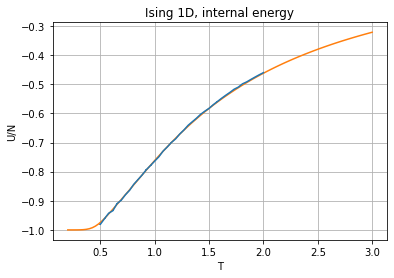

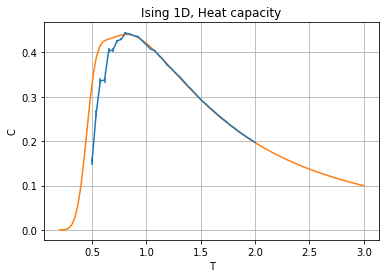

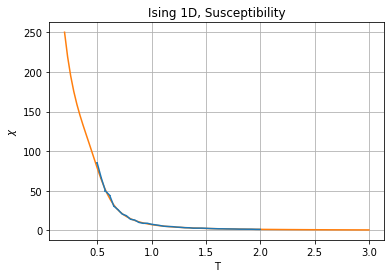

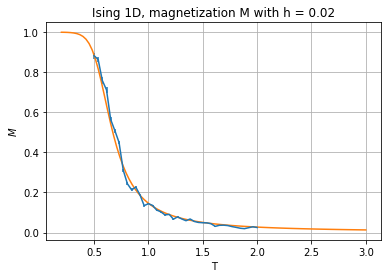

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table

def Show_Graphs(dirname) :

    Names = np.array(["Temps","U","errU","C","errC","X","errX"])
    datas = Table.read(dirname+"Simulation_results.txt",format="ascii",names=Names)

    #energia interna
    Temps = np.array(datas["Temps"])
    Us=np.array(datas["U"])
    errUs=np.array(datas["errU"])

    plt.errorbar(Temps,Us,yerr=errUs)
    plt.grid(True)
    points=100
    T = np.linspace(0.2,3.0,num=points)
    beta = 1/T
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    e = -J*( th + ch*thN )/( 1 + thN )
    plt.plot(T, e)
    plt.title('Ising 1D, internal energy')
    plt.xlabel('T')
    plt.ylabel('U/N')
    plt.show()

    #capacità termica
    Cs=np.array(datas["C"])
    errCs=np.array(datas["errC"])

    plt.errorbar(Temps,Cs,yerr=errCs)
    plt.grid(True)

    heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
    plt.plot(T, heat)
    plt.title('Ising 1D, Heat capacity')
    plt.xlabel('T')
    plt.ylabel('C')
    plt.show()

    # suscettività magnetica
    Xs=np.array(datas["X"])
    errXs=np.array(datas["errX"])

    plt.errorbar(Temps,Xs,yerr=errXs)
    plt.grid(True)

    X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    plt.plot(T, X)
    plt.title('Ising 1D, Susceptibility')
    plt.xlabel('T')
    plt.ylabel('$\chi$')
    plt.show()

    #magnetizzazione
    Names = np.array(["Temps","M","errM"])
    datas = Table.read("Metropolis_res/Magnetization_results.txt",format="ascii",names=Names)

    Temps = np.array(datas["Temps"])
    Ms=np.array(datas["M"])
    errMs=np.array(datas["errM"])

    plt.errorbar(Temps,Ms,yerr=errMs)
    plt.grid(True)

    h=0.02 #external field
    b = 1/T

    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    plt.plot(T, M)
    plt.title('Ising 1D, magnetization M with h = 0.02')
    plt.xlabel('T')
    plt.ylabel('$M$')
    plt.show()
    
Show_Graphs("Metropolis_res/")

Si nota che la simulazione riproduce fedelmente i valori teorici, soprattutto ad alte energie.

Per quanto riguarda le basse energie si vede una netta sottostima della capacità termica rispetto alla curva teorica. Inoltre, abbiamo piccole oscillazioni attorno al valore teorico per la magnetizzazione. Posso spiegare queste non idealità della simulazione con il fatto che l'algoritmo può andare a prendere minimi locali e non riuscire più a spostarsi da quelle posizioni. Questo problema può anche essere peggiorato da temperature basse, che tendono a conservare la posizione degli spin diminuendo la probabilità di transizione.

### <span style='color:blue'>Algoritmo di Gibbs</span>

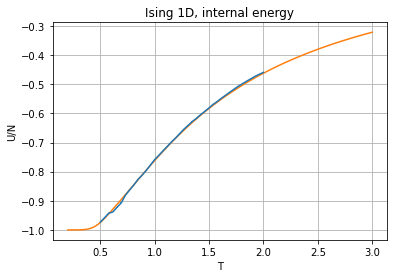

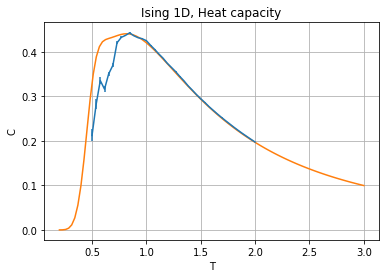

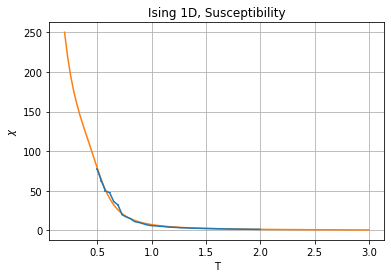

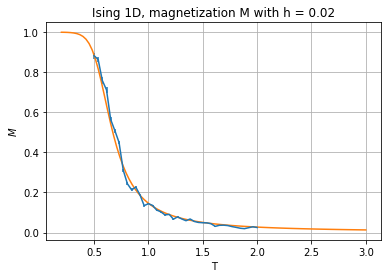

In [3]:
Show_Graphs("Gibbs_res/")

Notiamo come l'algoritmo di Gibbs dia risultati analoghi a quello di Metropolis per tutte le quantità in esame, riproducendo le non idealità soprattutto a bassa energia sulla capacità termica e sulla magnetizzazione.

Dato che potrebbe esserci qulache dubbio riguardante l'origine di questi problemi, ho fatto anche alcune simulazioni (questa volta solamente usando l'algoritmo di Metropolis) aumentando il numero di steps e cambiando il seed per la generazione di numeri casuali, in modo da escludere i problemi dati da una non sufficiente equilibrazione. Riporto quindi qui sotto i risultati.

### <span style='color:blue'>Simulazione con $10^5$ steps per blocco</span>

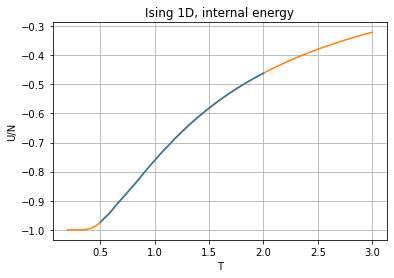

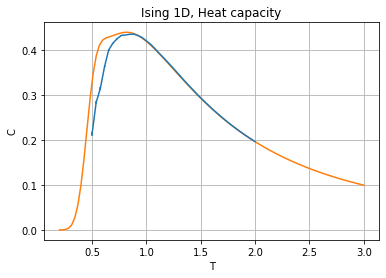

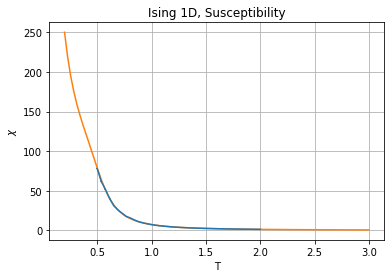

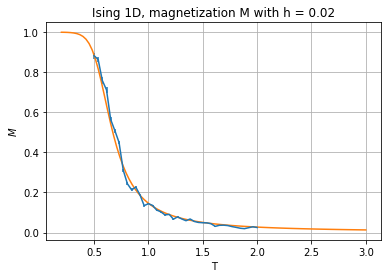

In [9]:
Show_Graphs("Metro_bigsim/")

Vediamo che nel caso di blocchi più lunghi non otteniamo risultati significativamente diversi dai precedenti.

### <span style='color:blue'>Simulazione con seed differente</span>

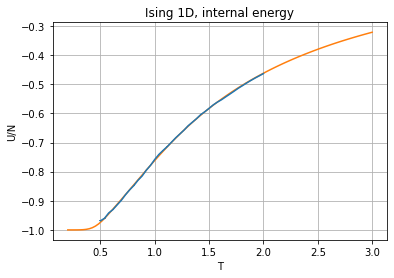

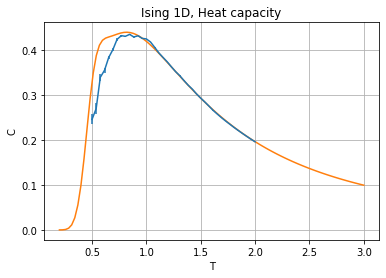

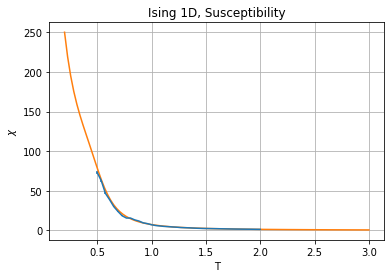

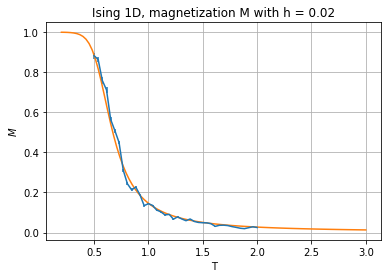

In [5]:
Show_Graphs("Diffseed_res/")

Anche cambiando seed non si evidenziano significative differenze. Possiamo quindi concludere che i problemi relativi al calcolo della magnetizzazione $M$ e alla sottostima della $C$ sono problemi intrinseci all'algoritmo e non semplici problemi dati da una non sufficiente equilibrazione.